In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

# Convert 'Date' to datetime if not already done
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered=df_filtered.sort_values(by='Date')
#df_filtered= df_filtered[df_filtered['region']=='West']
#df_filtered= df_filtered[df_filtered['AveragePrice']>1.1]

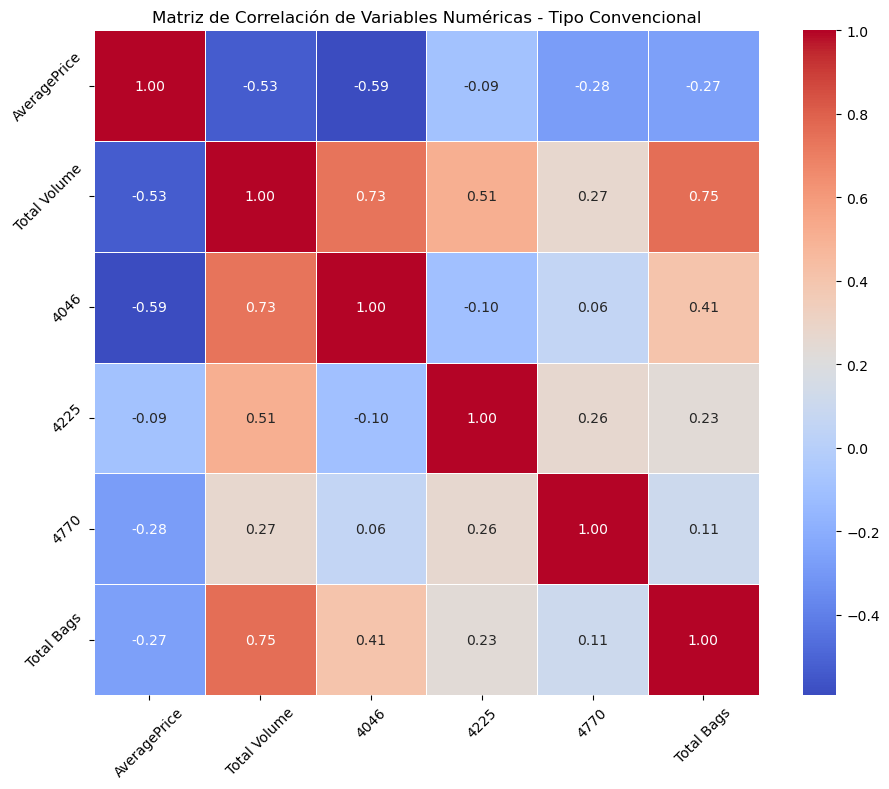

In [26]:
# Filter data for conventional type only
df_conventional = df_filtered[df_filtered['type'] == 'conventional']
#df_conventional = df_conventional[df_conventional['AveragePrice'] > 1]

# Calculate the correlation matrix for the conventional type data
correlation_matrix = df_conventional[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].corr()

# Configure the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Customize the plot
plt.title('Matriz de Correlación de Variables Numéricas - Tipo Convencional')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


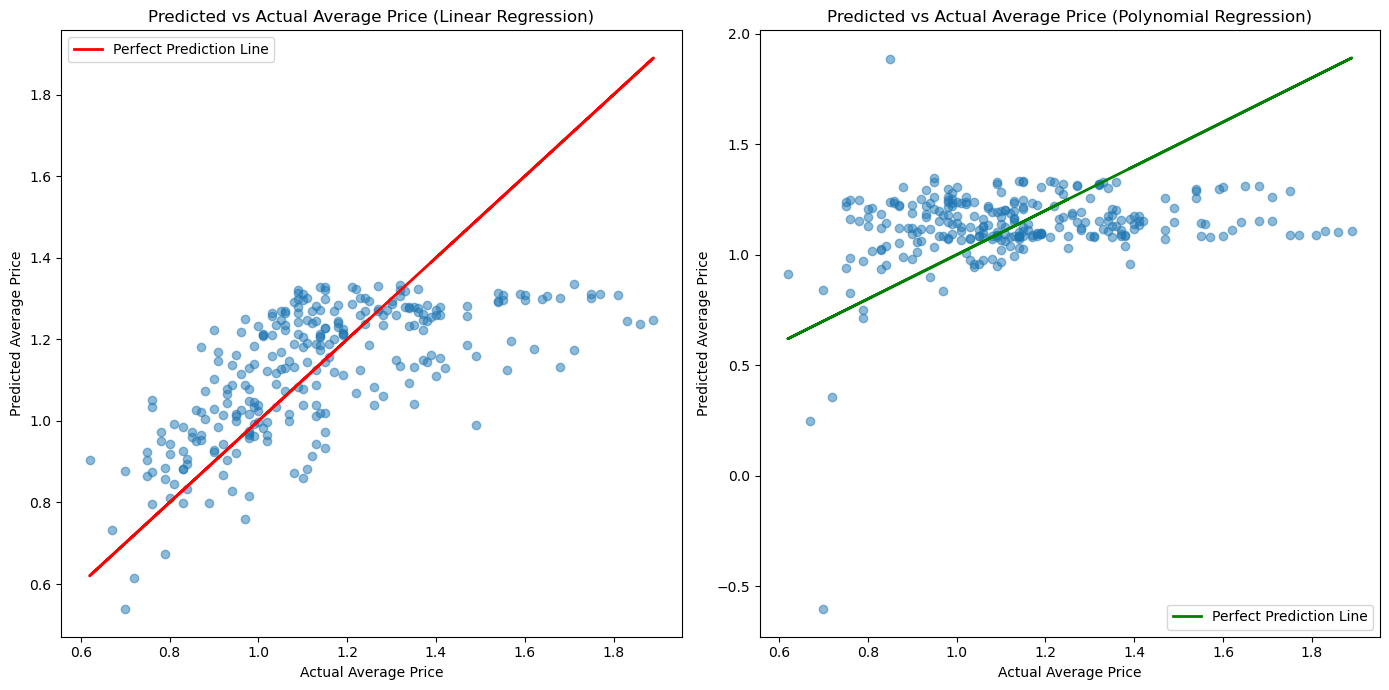

[-1.24483631e-07 -1.96984551e-08 -4.19297728e-07]
1.3896668710922069


In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_conventional[['4046','4225','4770']]  # Add more features as needed
y = df_conventional['AveragePrice']

# Standarzation
scaler = StandardScaler()
scaler2 = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = scaler2.fit_transform(X_scaled)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None,shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=None, shuffle=False)
#print(X_train)

# Linear regression model
#linear_model = LinearRegression( fit_intercept=True)
#linear_model = Ridge( fit_intercept=True)
linear_model = Lasso(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
y_train_linear = linear_model.predict(X_train)
coefficients = linear_model.coef_
intercept = linear_model.intercept_


# Polynomial regression model (degree 2 for a quadratic fit)
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
#poly_model = Lasso( fit_intercept=True)
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Plotting actual vs. predicted Average Price for both models
plt.figure(figsize=(14, 7))

# Scatter plot for linear regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Average Price (Linear Regression)')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.legend()

# Scatter plot for polynomial regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot(y_test, y_test, color='green', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Average Price (Polynomial Regression)')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()

print(coefficients)
print(intercept)

In [28]:
# Calculate R2 and RMSE for linear regression
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

#print(np.shape(y_train_linear))
#print(np.shape(y_train))

r2_linear_train = r2_score(y_train, y_train_linear)
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_train_linear))

# Calculate R2 and RMSE for polynomial regression
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print the results

print(f"Linear Regression R^2: {r2_linear:.4f}")
print(f"Linear Regression train R^2: {r2_linear_train:.4f}")
print(f"Linear Regression RMSE: {rmse_linear:.4f}")
print(f"Linear Regression train RMSE: {rmse_linear_train:.4f}")


#print(f"Polynomial Regression R^2: {r2_poly:.4f}")
#print(f"Polynomial Regression RMSE: {rmse_poly:.4f}")



Linear Regression R^2: 0.4340
Linear Regression train R^2: 0.4125
Linear Regression RMSE: 0.1854
Linear Regression train RMSE: 0.1763


In [29]:
# Obtener el número de características en el conjunto de datos de Boston
n_features = X_train.shape[1]  # Número de características

# Lista donde se guardarán los resultados de las métricas para cada característica
scores = []

# Iterar sobre todas las características disponibles en el conjunto de datos
for i in range(n_features):
    # Seleccionar el nombre de la característica i
    feat_name = X_train.columns[i]
    
    # Seleccionar los datos de entrenamiento para la característica i y convertirlos a 2D
    feat1_train = X_train[feat_name].values.reshape(-1,1)
    
    # Seleccionar los datos de prueba para la característica i y convertirlos a 2D
    feat1_test = X_test[[feat_name]].values.reshape(-1, 1)
    
    # Entrenar el modelo de regresión lineal utilizando solo la característica seleccionada
    linear_model.fit(feat1_train, y_train)
    
    # Predecir los valores de y para el conjunto de entrenamiento y de prueba
    y_train_pred = linear_model.predict(feat1_train)

    y_test_pred = linear_model.predict(feat1_test)

    train_score = linear_model.score(feat1_train, y_train)

    test_score = linear_model.score(feat1_test, y_test)

    rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    rmse_linear_pred = np.sqrt(mean_squared_error(y_test, y_test_pred))

    scores.append([train_score, test_score, rmse_linear_train, rmse_linear_pred])

df_scores = pd.DataFrame(scores, columns=["train_score", "test_score","train_rmse", "test_rmse"], index=X_train.columns)

df_scores.sort_values(by="test_score", ascending=False, inplace=True)

df_scores


,train_score,test_score,train_rmse,test_rmse
4046,0.347721,0.361932,0.185790,0.196899
4770,0.069833,0.099266,0.221864,0.233942
4225,0.005580,0.014420,0.229399,0.244712
